# Cost Function 그리기


In [1]:
import numpy as np
import matplotlib.pyplot as plt


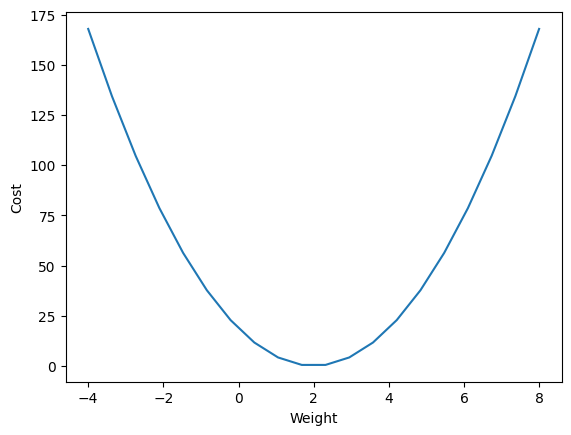

In [5]:
# Cost Function 정의
def MSE(w,x,y,b):
    s = 0 # 각 사례별 데이터의 오차 제곱합을 저장
    for i in range(len(x)):
        s += (y[i]- (w * x[i] + b)) ** 2
    return s / len(x)


# y = 2x + 0.1 모델 가정
x = [1.,2.,3.] # 입력변수, 독립변수, Feature
y = [2.1, 4.1, 6.1] # 출력변수 ,종속변수
b = 0.1

w_val = [] # 비용함수 그래프의 x축의 값
cost_val = [] # 비용함수 그래프의 y축의 값

for w in np.linspace(-4, 8, 20):
    c = MSE(w,x,y,b)
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val,cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

# 가중치 학습

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


-0.09027529589850945 0.17055522598064407


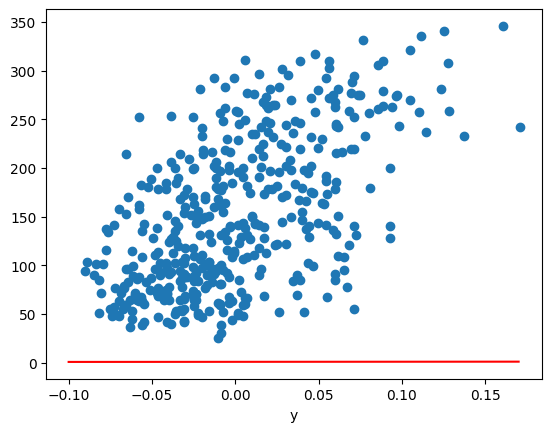

In [17]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

diabetes = load_diabetes()  # 당뇨병 환자 데이터 로드
# print(diabetes.DESCR)
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target # 베이스 라인 1년 후 질병 진행의 정량적 측정값
display(df.head())

### bmi와 target 값의 상관 관계 및 회귀 분석 ###
# 회귀선의 시작 값과 끝 값을 정하기위해 최소 최대 값을 확인


print(df['bmi'].min(),df['bmi'].max())
w = 1.0 # 초기 가중치
b = 1.0 # 초기 절편

pt1 = (-0.1,-0.1*w+b) # 회귀선의 시작 (x,y) 좌표
pt2 = (0.17,0.17*w+b) # 회귀선의 끝(x,y) 좌표

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.scatter(df['bmi'],df['target'])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

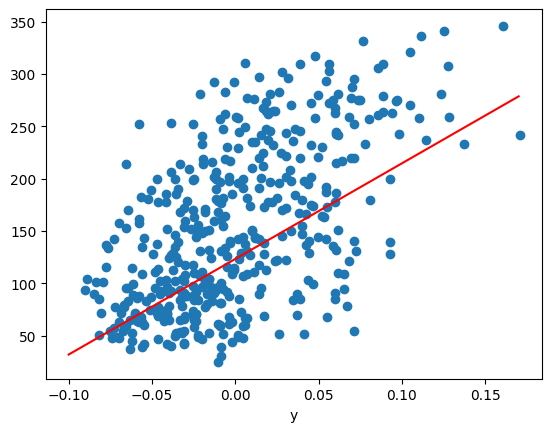

추정 w: 913.5973364346786
추정 b: 123.39414383177173


In [20]:
x = df['bmi'].values.tolist()
y = df['target'].values.tolist()

for i in range(100):
    for x_i, y_i in zip(x,y) :
        y_hat = w*x_i + b
        w = w - (y_hat - y_i) * x_i #MSE를 w에 대해 미분한 식
        b = b - (y_hat - y_i) # MSE를 b에 대해 미분한 식

pt1 = (-0.1,-0.1*w+b) # 회귀선의 시작 (x,y) 좌표
pt2 = (0.17,0.17*w+b) # 회귀선의 끝(x,y) 좌표

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.scatter(df['bmi'],df['target'])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

print('추정 w:', w)
print('추정 b:',b)

# 단변량 데이터의 Linear Regression
- 사이킷 런 라이브러리 활용
- https://scikit-learn.org

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1) 데이터 준비
x = np.array([1,3,2,4,7,4,9,2,3,2,6,3,2,7])
# ML에서는 학습 및 예측시 독립변수의 값이 vector의 형태로 입력되어야한다.
x = x.reshape(-1,1) # x = np.expand_dims(x,axis=1) #(10,) --> (10,1)
print(x)
y = np.array([3,9,6,7,10,6,12,2,4,3,8,5,3,8])

# 2) 모델 준비
model = LinearRegression()

# 3) 학습(fitting)
model.fit(x,y) # y = wx + b 선형식 적합

# 4 ) 평가
r_square = model.score(x,y)
print('R square:',r_square)

# 5 ) 예측
x_new = x[7].reshape(-1,1) # 예측에 사용될 새로운 값
y_hat = model.predict(x_new)
print('예측값: ',y_hat)
print('실제값: ' ,y[7])



[[1]
 [3]
 [2]
 [4]
 [7]
 [4]
 [9]
 [2]
 [3]
 [2]
 [6]
 [3]
 [2]
 [7]]
R square: 0.7464899534461854
예측값:  [4.05433746]
실제값:  2


# Linear Regression -2

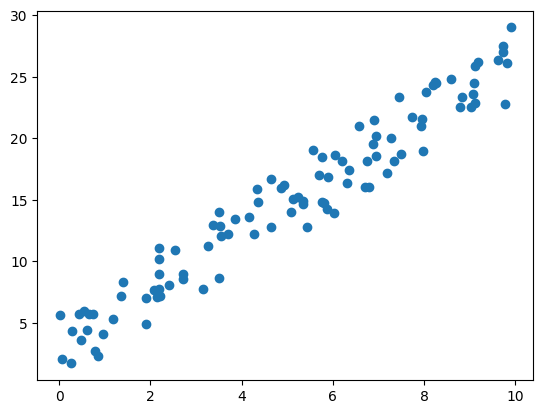

결정계수: 0.935
가중치: [[2.3623921]]
절편: [3.17687888]


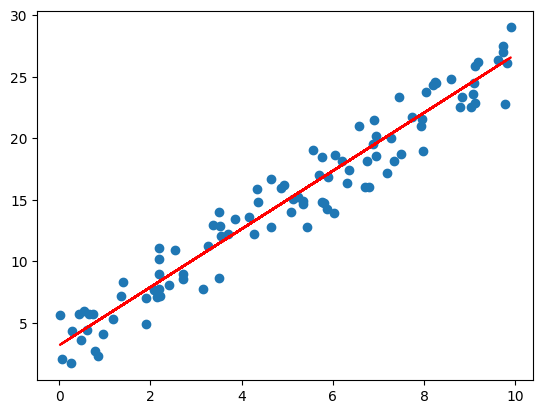

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비
X = np.random.rand(100,1) * 10 # [0,10] 범위의 100x1 행렬로 생성
y = (X * 2.3) + np.random.rand(100,1) * 6.4

plt.plot(X,y,'o')
plt.show()

# 2) 모델 준비
model = LinearRegression()

# 3) 학습 데이터와 평가 데이터 분리
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3,train_size= 0.7, random_state=10)

# 4) 학습
model.fit(X_train,y_train)

# 5) 평가
r_square = model.score(X_test,y_test)
print(f'결정계수: {r_square:.3f}')
print(f'가중치: {model.coef_}')
print(f'절편: {model.intercept_}')

# 6) 예측하고 결과 시각화
y_hat = model.predict(X)
plt.plot(X,y,'o')
plt.plot(X,y_hat,'r')
plt.show()


# [실습] 키와 몸무게를 이용해 모델을 학습 시킨후 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하시오

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


df = pd.read_csv('dataset/body.csv',na_filter=False)
df
X = df['Height'].values.reshape(-1,1)
y = df['Weight']





# 3) 학습 데이터와 평가 데이터 분리
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3,train_size= 0.7)

model = LinearRegression()
# 4) 학습
model.fit(X_train,y_train)

# 5) 평가
y_hat = model.predict(X_test)
r_square = model.score(X_test,y_test)
print(f'결정계수: {r2_score(y_test,y_hat):.3f}')
print(f'MAE: {mean_absolute_error(y_test,y_hat):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_hat)):.3f}')

# 6) 예측하고 결과 시각화
x_new = [[170]]
y_hat = model.predict(x_new)
print(f'키 170인 사람의 예측 몸무게:{y_hat}')
plt.plot(X,y,'o')
plt.plot(X,model.predict(X),'r')
plt.show()


결정계수: 0.071
MAE: 7.629
RMSE: 8.947


# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블록 그룹마다 주택 가격 데이터
    - longitude : 블록 경도
    - latitude : 블록 위도
    - housing_median_age : 블록 내 주택의 연력 중앙값
    - total_rooms : 블록 내 주택의 초 방 개수
    - total_bedrooms : 블록 내 주택의 총 침실수
    - population : 블록 내 거주 중인 총 주민수
    - households : 블록 내 총 가구수
    - median_income : 블록 내 가구의 소득 중앙값
    - median_house_value : 블록 내 가구의 주택 매매가 중앙값(종속변수)

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


결정계수: 0.954
예측값: [99478.]
실제값:86500.0


C:\Users\user\AppData\Local\Temp\ipykernel_10112\3308036585.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_y, label = 'y', shade = True)
C:\Users\user\AppData\Local\Temp\ipykernel_10112\3308036585.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_hat, label = 'y_hat', shade = True)


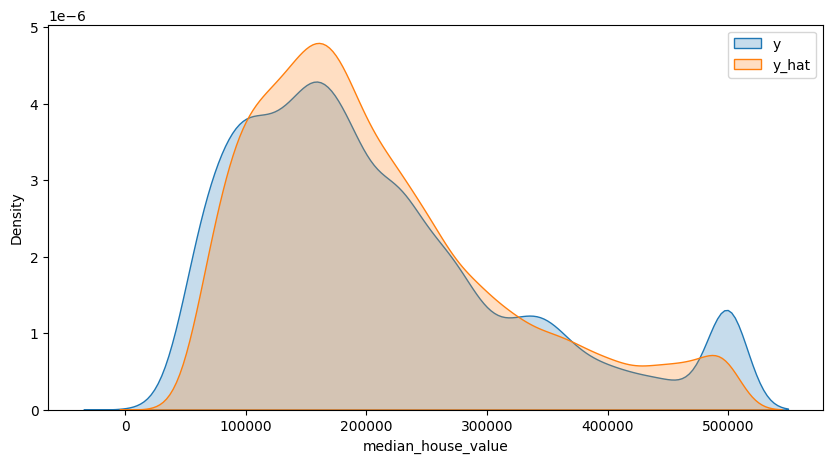

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset/california_housing_train.csv')
print(data.shape)
display(data.head())

x_columns = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

X = data[x_columns]
y = data['median_house_value']

# 2) 모델 준비
# model = LinearRegression()
model = RandomForestRegressor()

# 3) 학습
model.fit(X,y)

# 4) 평가
test_data = pd.read_csv('dataset/california_housing_train.csv')
test_x = test_data[x_columns]
test_y = test_data['median_house_value']
print(f'결정계수: {model.score(test_x, test_y):.3f}')

# 5) 예측하기
predict_data = test_x[10:11]
house_fee = model.predict(predict_data)

print(f'예측값: {house_fee}')
print(f'실제값:{test_y[10]}')

# 6) 시각화
y_hat = model.predict(test_x)
plt.figure(figsize=(10,5))
# kdeplot (확률 밀도 그래프): 히스토그램과 유사하나 각 데이터의 구간별 빈도수를 확률적으로 추정하여 부드러운 곡선으로 표현한다

sns.kdeplot(test_y, label = 'y', shade = True)
sns.kdeplot(y_hat, label = 'y_hat', shade = True)
plt.legend()
plt.show()